https://pint.readthedocs.io/en/0.9/

In [1]:
import pint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl
#mpl.rc('text', usetex=True)

In [3]:
ureg = pint.UnitRegistry()

In [4]:
3 * ureg.meter + 4 * ureg.cm

3.04 <Unit('meter')>

In [5]:
v = 5*ureg.teaspoon

In [6]:
v = v.to(ureg.ml)

In [7]:
q = ureg.Quantity(25, 'µg/m**3')

In [8]:
q*v

616.1151992187499 <Unit('microgram * milliliter / meter ** 3')>

In [9]:
(q*v).to_base_units()

6.161151992187501e-13 <Unit('kilogram')>

In [10]:
(q*v).to(ureg.gram)

6.1611519921875e-10 <Unit('gram')>

In [11]:
dict(q.dimensionality)

{'[mass]': 1.0, '[length]': -3.0}

In [12]:
v.dimensionality

<UnitsContainer({'[length]': 3.0})>

In [13]:
v.dimensionless

False

In [14]:
v.dimensionality == q.dimensionality

False

In [15]:
ureg.Quantity(1, 'mL') == ureg.Quantity(1, 'm**3')

False

In [16]:
ureg.Quantity(1, 'mL') == ureg.Quantity(1e-6, 'm**3')

True

In [17]:
v.units

<Unit('milliliter')>

In [18]:
L = [ureg.Quantity(5, 'mm'), ureg.Quantity(10, 'mm**2'), ureg.Quantity(25, 'cm**3')]
L2 = [ureg.Quantity(2, 'mm**3'), ureg.Quantity(4, 'nm**2'), ureg.Quantity(6, 'm')]
L

[5 <Unit('millimeter')>,
 10 <Unit('millimeter ** 2')>,
 25 <Unit('centimeter ** 3')>]

In [19]:
np.array(L, dtype=object)*3

array([<Quantity(15, 'millimeter')>, <Quantity(30, 'millimeter ** 2')>,
       <Quantity(75, 'centimeter ** 3')>], dtype=object)

In [20]:
M = ureg.Quantity(np.array([1,2,3]), 'mm')
M

array([1, 2, 3]) <Unit('millimeter')>

In [21]:
print(M)

[1 2 3] millimeter


In [22]:
M*3

array([3, 6, 9]) <Unit('millimeter')>

In [23]:
np.array(L, dtype=object)*np.array(L2, dtype=object)

array([<Quantity(10, 'millimeter ** 4')>,
       <Quantity(40, 'millimeter ** 2 * nanometer ** 2')>,
       <Quantity(150, 'centimeter ** 3 * meter')>], dtype=object)

In [24]:
print((M+M)*(M-0.5*M))

[1. 4. 9.] millimeter ** 2


In [25]:
t = ureg.Quantity(np.linspace(0, 10, 100), 's')
v0 = ureg.Quantity(10, 'm/s')
x0 = ureg.Quantity(-5, 'dam')
x = (x0 + v0*t).to_base_units()

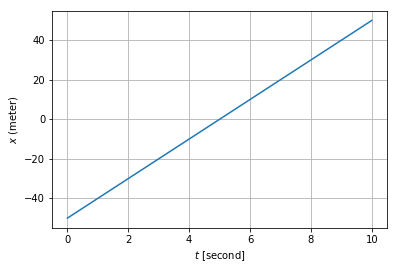

In [26]:
fig, axe = plt.subplots()
axe.plot(t.m, x.m)
axe.set_xlabel(r"$t$ $[{:L}]$".format(t.units))
axe.set_ylabel("$x$ (%s)" % x.units)
axe.grid()

In [27]:
r"$t$ $[{:Lx}]$".format(t[0])

'$t$ $[\\SI[]{0.0}{\\second}]$'

In [28]:
r"$t$ $[{:Lx}]$".format(t.units)

'$t$ $[\\si[]{\\second}]$'